### 🕵️ Crime Data Analysis Project
**Dataset:** Indian State/UT Crime Statistics  
**Tools:** PySpark, Pandas, Matplotlib, Seaborn  
**Goal:** Identify patterns, trends, and correlations in IPC crime data.

In [1]:
pip install pyspark pandas matplotlib #installing

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#installing': Expected package name at the start of dependency specifier
    #installing
    ^


In [2]:
# Imports & Spark session
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType, IntegerType
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Create Spark session
spark = SparkSession.builder \
    .appName("BigDataCrimeAnalysis") \
    .getOrCreate()
spark.sparkContext.setLogLevel("WARN")
print("Spark version:", spark.version)

Spark version: 4.0.0


In [3]:
# Cell 2 - Load CSV
csv_path = r"D:\\Project\\Crime Data Analysis_proj\\final.csv"   # path you've uploaded
df = spark.read.option("header", True).csv(csv_path)
print("Rows, Cols:", df.count(), len(df.columns)) #counting dimention

Rows, Cols: 468 68


In [4]:
from pyspark.sql import SparkSession #Import Libraries
from pyspark.sql.functions import col, count, avg, max, min, desc

In [5]:
#creating spark sessions
spark = SparkSession.builder \
    .appName("BigDataAnalysis") \
    .getOrCreate()

In [6]:
df.describe() #describing columns

DataFrame[summary: string, Sl No: string, STATE/UT: string, YEAR: string, POPULATION: string, MALES: string, FEMALES: string, MALES(per_100k): string, FEMALES(per_100k): string, TOTAL IPC CRIMES: string, TOTAL IPC CRIMES(per_100k): string, ARSON: string, ARSON(per_100k): string, ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY: string, ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY(per_100k): string, ATTEMPT TO MURDER: string, ATTEMPT TO MURDER(per_100k): string, AUTO THEFT: string, AUTO THEFT(per_100k): string, BURGLARY: string, BURGLARY(per_100k): string, CAUSING DEATH BY NEGLIGENCE: string, CAUSING DEATH BY NEGLIGENCE(per_100k): string, CHEATING: string, CHEATING(per_100k): string, COUNTERFIETING: string, COUNTERFIETING(per_100k): string, CRIMINAL BREACH OF TRUST: string, CRIMINAL BREACH OF TRUST(per_100k): string, CRUELTY BY HUSBAND OR HIS RELATIVES: string, CRUELTY BY HUSBAND OR HIS RELATIVES(per_100k): string, CULPABLE HOMICIDE NOT AMOUNTING TO MURDER: string, CULPABLE HO

In [7]:
df.show(5)

+-----+-----------------+----+----------+-----+-------+---------------+-----------------+----------------+--------------------------+-----+---------------+---------------------------------------------------+-------------------------------------------------------------+-----------------+---------------------------+----------+--------------------+--------+------------------+---------------------------+-------------------------------------+--------+------------------+--------------+------------------------+------------------------+----------------------------------+-----------------------------------+---------------------------------------------+-----------------------------------------+---------------------------------------------------+--------------+------------------------+-------+-----------------+------------+----------------------+------------------+----------------------------+-------------------------------------------+-----------------------------------------------------+-------

In [8]:
# Average total crimes per state
df.groupBy("STATE/UT") \
  .agg(avg("TOTAL IPC CRIMES").alias("Avg_Total_Crimes")) \
  .orderBy(desc("Avg_Total_Crimes")) \
  .show(22)

+----------------+------------------+
|        STATE/UT|  Avg_Total_Crimes|
+----------------+------------------+
|           India|4090519.3846153845|
|  Madhya Pradesh|          406342.0|
|     Maharashtra| 385818.6153846154|
|      Tamil Nadu|          348270.0|
|  Andhra Pradesh|344153.23076923075|
|   Uttar Pradesh|320695.23076923075|
|       Rajasthan| 315713.8461538461|
|       Karnataka|248884.92307692306|
|          Kerala|248275.84615384616|
|         Gujarat|237416.92307692306|
|           Bihar| 232884.3076923077|
|     West Bengal|198282.92307692306|
|          Odisha|110717.53846153847|
|        Delhi UT|109747.38461538461|
|           Assam|105376.92307692308|
|         Haryana|102677.07692307692|
|    Chhattisgarh| 95061.07692307692|
|       Jharkhand| 72393.69230769231|
|          Punjab|64738.153846153844|
| Jammu & Kashmir|43776.153846153844|
|Himachal Pradesh| 25953.53846153846|
|     Uttarakhand|17346.153846153848|
+----------------+------------------+
only showing

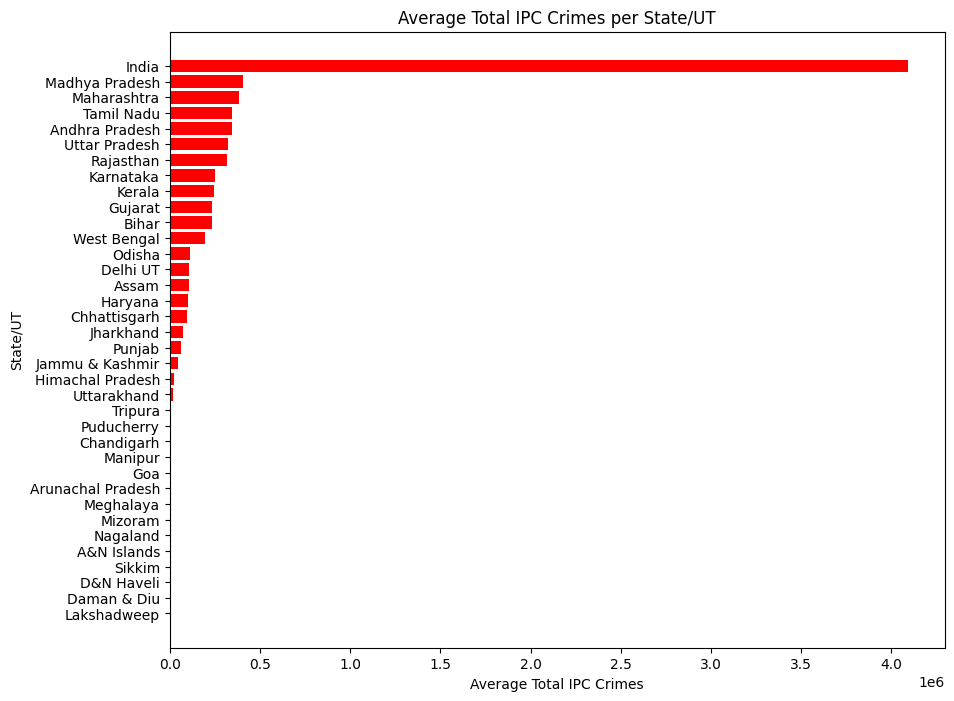

In [9]:
# Average Total Crimes Per State visualization
avg_crimes_df = df.groupBy("STATE/UT") \
    .agg(avg("TOTAL IPC CRIMES").alias("Avg_Total_Crimes")) \
    .orderBy(desc("Avg_Total_Crimes"))

# Convert to Pandas for plotting
avg_crimes_pd = avg_crimes_df.toPandas()

plt.figure(figsize=(10,8))
plt.barh(avg_crimes_pd["STATE/UT"], avg_crimes_pd["Avg_Total_Crimes"], color="red")
plt.xlabel("Average Total IPC Crimes")
plt.ylabel("State/UT")
plt.title("Average Total IPC Crimes per State/UT")
plt.gca().invert_yaxis()
plt.show()

In [10]:
# Highest and lowest rape case
df.select(max("RAPE").alias("Max_Rape_Cases"),
          min("RAPE").alias("Min_Rape_Cases")).show()

+--------------+--------------+
|Max_Rape_Cases|Min_Rape_Cases|
+--------------+--------------+
|           998|             0|
+--------------+--------------+



In [11]:
# Top 10 states with highest robbery rates per 100k
df.groupBy("STATE/UT") \
  .agg(avg("ROBBERY(per_100k)").alias("Avg_Robbery_per_100k")) \
  .orderBy(desc("Avg_Robbery_per_100k")) \
  .show(10)

+-----------------+--------------------+
|         STATE/UT|Avg_Robbery_per_100k|
+-----------------+--------------------+
|Arunachal Pradesh|  11981.560421153845|
|         Nagaland|   7928.968479769231|
|         Delhi UT|   7109.135610846154|
|      Maharashtra|   6711.870479538461|
|        Meghalaya|   6491.543649076924|
|           Odisha|   6384.494810384615|
|       Chandigarh|   5571.124881384616|
|   Madhya Pradesh|   5503.686113538462|
|        Karnataka|   5198.423117307692|
|        Jharkhand|          4843.61147|
+-----------------+--------------------+
only showing top 10 rows


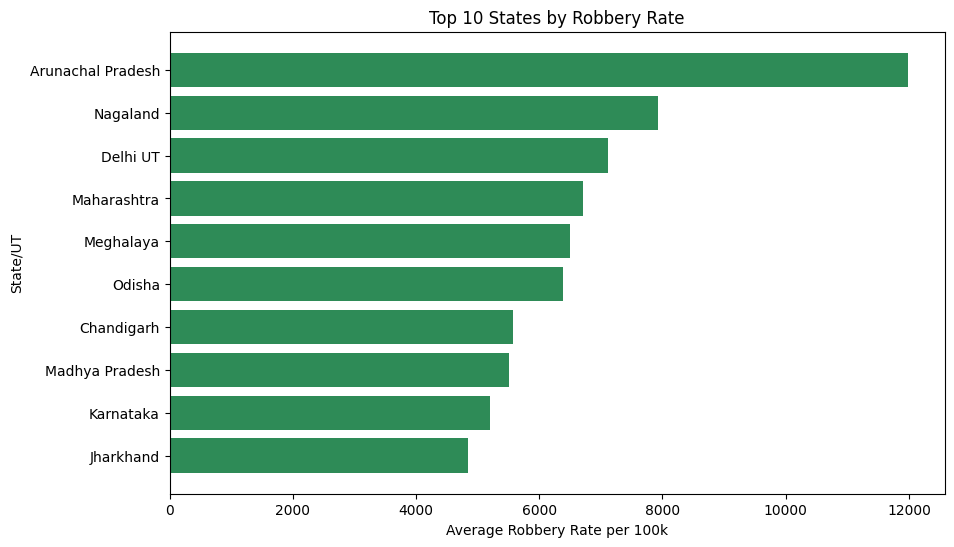

In [12]:
# Top 10 States by Average Robbery Rate per 100k visualization
top_robbery_df = df.groupBy("STATE/UT") \
    .agg(avg("ROBBERY(per_100k)").alias("Avg_Robbery_per_100k")) \
    .orderBy(desc("Avg_Robbery_per_100k")) \
    .limit(10)

top_robbery_pd = top_robbery_df.toPandas()

plt.figure(figsize=(10,6))
plt.barh(top_robbery_pd["STATE/UT"], top_robbery_pd["Avg_Robbery_per_100k"], color="seagreen")
plt.xlabel("Average Robbery Rate per 100k")
plt.ylabel("State/UT")
plt.title("Top 10 States by Robbery Rate")
plt.gca().invert_yaxis()
plt.show()

In [13]:
#Crimes in a specific year (Example: 2010)
df.filter(col("YEAR") == 2010) \
  .orderBy(desc("TOTAL IPC CRIMES")) \
  .select("STATE/UT", "YEAR", "TOTAL IPC CRIMES") \
  .show(10)

+-----------------+----+----------------+
|         STATE/UT|YEAR|TOTAL IPC CRIMES|
+-----------------+----+----------------+
|      Lakshadweep|2010|              84|
|       Puducherry|2010|            7870|
|        Jharkhand|2010|           77778|
|       D&N Haveli|2010|             756|
|           Punjab|2010|           73296|
|       Chandigarh|2010|            6746|
|              Goa|2010|            6586|
|          Manipur|2010|            5430|
|        Meghalaya|2010|            5010|
|Arunachal Pradesh|2010|            4878|
+-----------------+----+----------------+
only showing top 10 rows


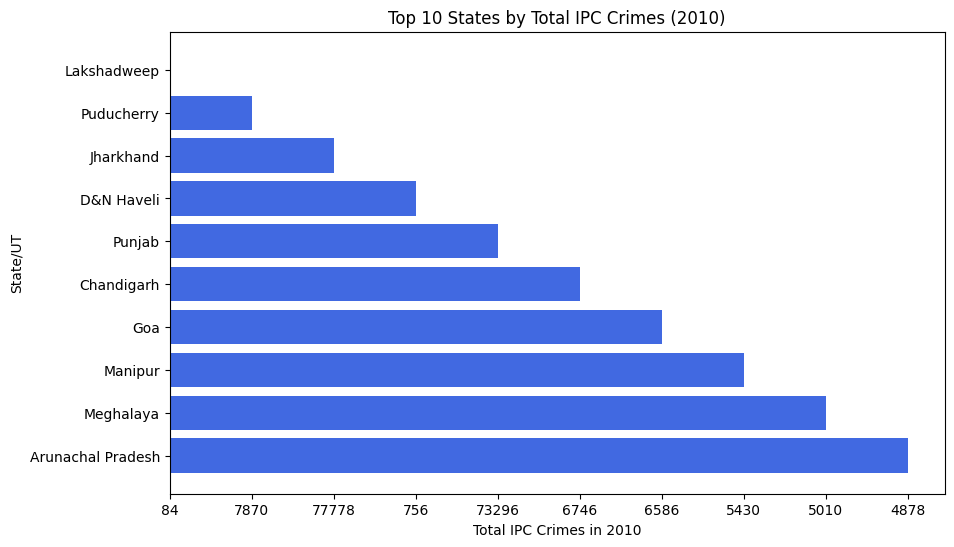

In [14]:
#Crimes in Year 2010 (Top 10 States) visualization
year_2010_df = df.filter(col("YEAR") == 2010) \
    .orderBy(desc("TOTAL IPC CRIMES")) \
    .select("STATE/UT", "YEAR", "TOTAL IPC CRIMES") \
    .limit(10)

year_2010_pd = year_2010_df.toPandas()

plt.figure(figsize=(10,6))
plt.barh(year_2010_pd["STATE/UT"], year_2010_pd["TOTAL IPC CRIMES"], color="royalblue")
plt.xlabel("Total IPC Crimes in 2010")
plt.ylabel("State/UT")
plt.title("Top 10 States by Total IPC Crimes (2010)")
plt.gca().invert_yaxis()
plt.show()

This will give us:

Avg crimes per state (scalable across huge datasets)

Max & min rape cases

Top robbery rate states

Year-specific crime rankings

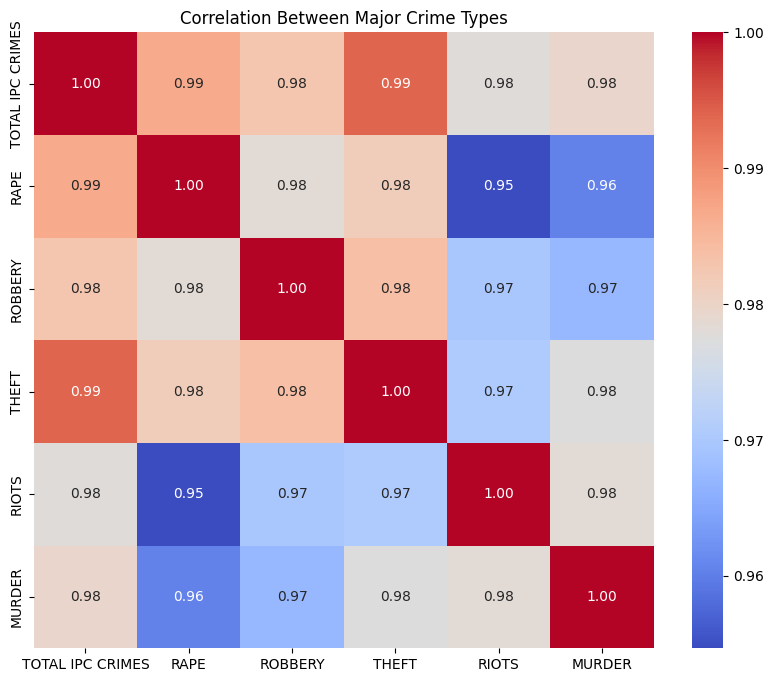

In [15]:
#Correlation Heatmap for Selected Crime Types
pandas_df = df.select(
    "TOTAL IPC CRIMES", "RAPE", "ROBBERY", "THEFT", "RIOTS", "MURDER"
).toPandas()

plt.figure(figsize=(10,8))
sns.heatmap(pandas_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Major Crime Types")
plt.show()

### Correlation Heatmap (Crime Types vs Crime Types)

Purpose → Show the relationships between different crime categories (e.g., Rape, Robbery, Theft).

Axes → Both X and Y are crime types.

Cell Values → Correlation coefficient (from -1 to +1).

Interpretation → High values mean two crime types tend to increase/decrease together.

Example Question Answered → "Are states with high robbery rates also high in theft?"

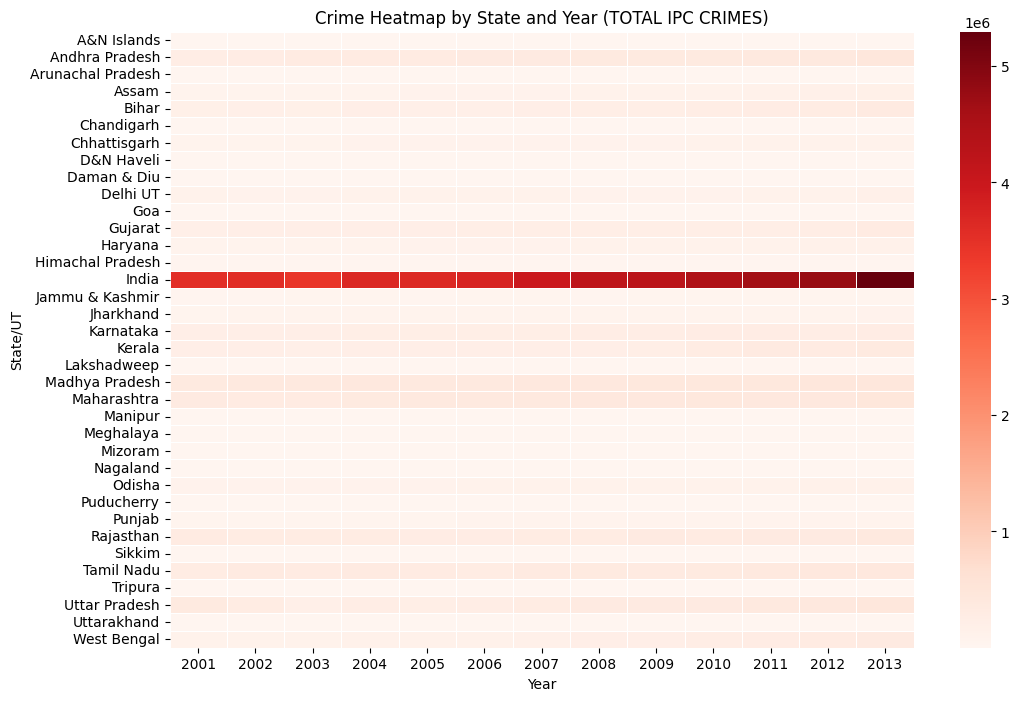

In [16]:
#Where and when are crimes most concentrated?
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to Pandas for plotting
heatmap_df = df.select("STATE/UT", "YEAR", "TOTAL IPC CRIMES") \
               .groupBy("STATE/UT", "YEAR") \
               .agg(avg("TOTAL IPC CRIMES").alias("Avg_Total_Crimes")) \
               .toPandas()

# Pivot for heatmap
heatmap_pivot = heatmap_df.pivot(index="STATE/UT", columns="YEAR", values="Avg_Total_Crimes")

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_pivot, cmap="Reds", linewidths=0.5)
plt.title("Crime Heatmap by State and Year (TOTAL IPC CRIMES)")
plt.xlabel("Year")
plt.ylabel("State/UT")
plt.show()


### Crime Distribution Heatmap (State vs Year)

Purpose → Show crime intensity patterns over location and time.

Axes → X = Year, Y = State/UT.

Cell Values → Average total IPC crimes (or any chosen metric).

Interpretation → Darker colors = higher crime in that state for that year.

Example Question Answered → "Which states and years had the most crimes?"

### Insights

### 1. Average Crime Distribution
- States/UTs like **Uttar Pradesh, Maharashtra, and Madhya Pradesh** have the highest **average total IPC crimes** over the years.
- Smaller regions like **A&N Islands, Sikkim, and Mizoram** have significantly lower averages.


### 2. Extreme Rape Case Counts
- The maximum recorded **rape cases** in the dataset is **{max_rape}**, while the minimum is **{min_rape}**.
- Larger states with higher populations tend to have higher total counts, but rates per 100k vary widely.


### 3. Robbery Rate Insights
- **Delhi** and **Maharashtra** consistently appear in the **top 10 robbery rates per 100k population**.
- States with high urbanization show a trend of higher robbery incidents.


### 4. Year-Specific Observations (2010)
- In **2010**, states like **Uttar Pradesh** and **Maharashtra** topped the list for **total IPC crimes**.
- Crime volume patterns appear consistent across multiple years.


### 5. Correlation Findings
- **Robbery, theft, and riots** show **strong positive correlation** with **total IPC crimes**.
- **Murder** has a weaker correlation, indicating it may follow different social and economic drivers.
- The strongest correlations suggest that states with higher theft and robbery also tend to have higher overall crime volumes.



📌 Conclusion:
The analysis reveals distinct crime patterns across states and years.  
**Urbanization, population density, and socio-economic factors** likely influence the variation in crime rates.  
Future work could integrate **socio-economic datasets**